In [81]:
from bs4 import BeautifulSoup
import requests
import html5lib
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import pandas as pd

In [84]:
rurl='https://ipocentral.in/nifty-50-stock-list-weightage/'
resq=requests.get(rurl)
soup=BeautifulSoup(resq.text,'html.parser')

In [85]:
companies=soup.find_all('table')

In [86]:
nifty=[]
for i in companies:
    for j in i.find_all('strong'):
        nifty.append(j.text)
nifty=nifty[5:]
for i in nifty:
    if i[0] not in 'ABCDEFGHIJLMNOPQRSTUVWXYZ':
        nifty.remove(i)

In [87]:
fifty_companies=[i.replace(' ','') for i in nifty]
fifty_companies=[i+'.NS' for i in fifty_companies]
for i in range(len(fifty_companies)):
    if fifty_companies[i]=='BHARTIAIRTL.NS':
        fifty_companies[i]='BHARTIARTL.NS'

In [88]:
re=['ASIANPAINTS.NS','INDUSBNK.NS','\xa0.NS','EICHERMOTO.NS','APPOLOHOSP.NS']
for i in re:
    fifty_companies.remove(i)

In [89]:
s=['INDUSINDBK.NS','ASIANPAINT.NS','EICHERMOT.NS','APOLLOHOSP.NS','KOTAKBANK.NS']

In [90]:
fifty_companies=fifty_companies+s

In [91]:
finalest = pd.DataFrame(columns=['Date1','Open','High','Low','Close','Adj Close','Volume','Company'])

In [25]:
# new2=new1[:13]
# new3=new1[14:26]
# new4=new1[26:39]
# new5=new1[39:]

In [92]:
import yfinance as yf
for i in fifty_companies:
    data = yf.download(i,'2018-01-01','2022-12-31')
    data['Company']=''
    data.loc[:,'Company']=i.strip('.NS')
#     data.to_csv(i.strip('.NS')+'.csv')
    finalest=pd.concat([finalest,data])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [93]:
finalest.reset_index(inplace=True)

In [94]:
finalest.drop(columns=['Date1'],inplace=True)

In [95]:
for i in finalest.columns[:-1]:
    finalest[i]=pd.to_numeric(finalest[i],errors='coerce')

In [96]:
finalest['index']=pd.to_datetime(finalest['index'])

In [97]:
finalest.to_csv('nifty50.csv')

In [ ]:
for company in fifty_companies:
    web='https://finance.yahoo.com/quote/'+company'/history?p='+company
    driver=webdriver.Chrome(path)
    driver.get(web)
    driver.find_element(By.XPATH,"//span[contains(text(),'Nov 04, 2021 - Nov 04, 2022')]").click()
    time.sleep(11)
    driver.find_element(By.XPATH,"//body/div[@id='app']/div[1]/div[1]/div[1]/div[1]/div[3]/div[1]/div[1]/div[2]/section[1]/div[1]/div[1]/div[1]/div[1]/div[1]/div[2]/div[1]/ul[2]/li[4]/button[1]").click()
    time.sleep(11)
    driver.find_element(By.XPATH,"//body/div[@id='app']/div[1]/div[1]/div[1]/div[1]/div[3]/div[1]/div[1]/div[2]/section[1]/div[1]/div[1]/button[1]").click()
    time.sleep(11)
    driver.find_element(By.XPATH,"//body/div[@id='app']/div[1]/div[1]/div[1]/div[1]/div[3]/div[1]/div[1]/div[2]/section[1]/div[1]/div[2]/span[2]/a[1]").click()



In [18]:
# x=pd.get_dummies(finalest['Company'])
# nifty50=pd.concat([finalest,x],axis=1)
# nifty50.drop(columns='Company',inplace=True)

In [36]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

## Final Model

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import date,datetime,timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential
import time
from datetime import datetime,date,timedelta

In [ ]:
ticker=ws.cell(1,4).value+'.NS'
quantity=ws.cell(2,4).value
Buying_date=ws.cell(3,4).value
selling_date=ws.cell(4,4).value

In [ ]:
sell_year=int(selling_date.split('-')[0])
sell_month=int(selling_date.split('-')[1])
sell_day=int(selling_date.split('-')[2])
our_end_date=date(2022,3,31)
sell_date=date(sell_year,sell_month,sell_day)

In [ ]:
buy_year=int(Buying_date.split('-')[0])
buy_month=int(Buying_date.split('-')[1])
buy_day=int(Buying_date.split('-')[2])
our_end_date=date(2022,3,31)
buy_date=date(buy_year,buy_month,buy_day)

In [ ]:
Profit_loss=(sell_date_price-buy_date_price)*int(quantity)

In [10]:
df=yf.download(ticker,'2018-01-01','2022-03-31')
data = df.sort_index(ascending=True, axis=0)
dat=data.reset_index()
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = dat['Date'][i]
    new_data['Close'][i] = dat['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

[*********************100%***********************]  1 of 1 completed


In [11]:
train = dataset[0:int(0.7*len(df)),:]
valid = dataset[int(0.7*len(df)):,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(100,len(train)):
    x_train.append(scaled_data[i-100:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

valid = scaled_data[int(0.7*len(df)):,:]

In [27]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape =(x_train.shape[1],1)))
model. add (Dropout(0.2)) 

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model. add (Dropout(0.3)) 

model.add(LSTM(units = 120, activation = 'relu'))
model. add (Dropout(0.4)) 

model.add(Dense(units = 1))

In [28]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
20/20 [==============================] - 26s 337ms/step - loss: 0.0019
Epoch 2/50
20/20 [==============================] - 5s 268ms/step - loss: 6.7009e-04
Epoch 3/50
20/20 [==============================] - 5s 272ms/step - loss: 3.3035e-04
Epoch 4/50
20/20 [==============================] - 5s 267ms/step - loss: 2.4767e-04
Epoch 5/50
20/20 [==============================] - 6s 281ms/step - loss: 2.1716e-04
Epoch 6/50
20/20 [==============================] - 5s 268ms/step - loss: 1.9752e-04
Epoch 7/50
20/20 [==============================] - 6s 283ms/step - loss: 2.2269e-04
Epoch 8/50
20/20 [==============================] - 6s 280ms/step - loss: 2.2913e-04
Epoch 9/50
20/20 [==============================] - 6s 280ms/step - loss: 2.2829e-04
Epoch 10/50
20/20 [==============================] - 6s 283ms/step - loss: 1.7579e-04
Epoch 11/50
20/20 [==============================] - 5s 261ms/step - loss: 1.7829e-04
Epoch 12/50
20/20 [==============================] - 6s 287ms/step

In [12]:
sell_year=int(selling_date.split('-')[0])
sell_month=int(selling_date.split('-')[1])
sell_day=int(selling_date.split('-')[2])
our_end_date=date(2022,3,31)
sell_date=date(sell_year,sell_month,sell_day)

In [40]:
import time
from datetime import datetime,date,timedelta


In [129]:
for i in df.index:
    if sell_date == i.date():
        sell_date_price=df.loc[i]['Close']
        break
else:
    while (sell_date-our_end_date).days!=0:
        sample=scaled_data[scaled_data.shape[0]-100:scaled_data.shape[0]]
        sample=sample.reshape(1,100,1)
        predicted=model.predict(sample)
        scaled_data=np.append(scaled_data,[predicted[0,0]])
        sell_date-=timedelta(days=1)
    sell_date_price=scaler.inverse_transform(np.array(scaled_data[-1]).reshape(-1,1))

1/1 [==============================] - 0s 94ms/step


In [ ]:
df2=yf.download(ticker,'2018-01-01','2022-3-31')
data2 = df2.sort_index(ascending=True, axis=0)
open_data=data2.reset_index()
open_new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Open'])
for i in range(0,len(data)):
    open_new_data['Date'][i] = open_data['Date'][i]
    open_new_data['Open'][i] = open_data['Open'][i]

#setting index
open_new_data.index = open_new_data.Date
open_new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
open_dataset = open_new_data.values

train_open = open_dataset[0:int(0.7*len(df2)),:]
valid_open = open_dataset[int(0.7*len(df2)):,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_open = scaler.fit_transform(dataset)

open_x_train, open_y_train = [], []
for i in range(100,len(train_open)):
    open_x_train.append(scaled_data_open[i-100:i,0])
    open_y_train.append(scaled_data_open[i,0])
open_x_train, open_y_train = np.array(open_x_train), np.array(open_y_train)

open_x_train = np.reshape(open_x_train, (open_x_train.shape[0],open_x_train.shape[1],1))

valid_open = scaled_data_open[int(0.7*len(df2)):,:]

open_model = Sequential()
open_model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape =(open_x_train.shape[1],1)))
open_model. add (Dropout(0.2)) 

open_model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
open_model. add (Dropout(0.3)) 

open_model.add(LSTM(units = 120, activation = 'relu'))
open_model. add (Dropout(0.4)) 

open_model.add(Dense(units = 1))

open_model.compile(optimizer='adam', loss = 'mean_squared_error')
open_model.fit(open_x_train, open_y_train, epochs = 50)

for i in df2.index:
    if buy_date == i.date():
        buy_date_price=df2.loc[i]['Open']
else:
    while (buy_date-our_end_date).days!=0:
        sample=scaled_data_open[scaled_data_open.shape[0]-100:scaled_data_open.shape[0]]
        sample=sample.reshape(1,100,1)
        predicted=open_model.predict(sample)
        scaled_data_open=np.append(scaled_data_open,[predicted[0,0]])
        buy_date-=timedelta(days=1)
    buy_date_price=scaler.inverse_transform(np.array(scaled_data_open[-1]).reshape(-1,1))

In [57]:
df2=yf.download(ticker,'2018-01-01','2022-3-31')
data2 = df2.sort_index(ascending=True, axis=0)
open_data=data2.reset_index()
open_new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Open'])
for i in range(0,len(data)):
    open_new_data['Date'][i] = open_data['Date'][i]
    open_new_data['Open'][i] = open_data['Open'][i]

#setting index
open_new_data.index = open_new_data.Date
open_new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
open_dataset = open_new_data.values

[*********************100%***********************]  1 of 1 completed


In [58]:
train_open = open_dataset[0:int(0.7*len(df2)),:]
valid_open = open_dataset[int(0.7*len(df2)):,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_open = scaler.fit_transform(dataset)

open_x_train, open_y_train = [], []
for i in range(100,len(train_open)):
    open_x_train.append(scaled_data_open[i-100:i,0])
    open_y_train.append(scaled_data_open[i,0])
open_x_train, open_y_train = np.array(open_x_train), np.array(open_y_train)

open_x_train = np.reshape(open_x_train, (open_x_train.shape[0],open_x_train.shape[1],1))

valid_open = scaled_data_open[int(0.7*len(df2)):,:]

In [59]:
open_model = Sequential()
open_model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape =(open_x_train.shape[1],1)))
open_model. add (Dropout(0.2)) 

open_model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
open_model. add (Dropout(0.3)) 

open_model.add(LSTM(units = 120, activation = 'relu'))
open_model. add (Dropout(0.4)) 

open_model.add(Dense(units = 1))

In [60]:
open_model.compile(optimizer='adam', loss = 'mean_squared_error')
open_model.fit(open_x_train, open_y_train, epochs = 50)

Epoch 1/50
20/20 [==============================] - 34s 344ms/step - loss: 0.0016
Epoch 2/50
20/20 [==============================] - 5s 267ms/step - loss: 4.0353e-04
Epoch 3/50
20/20 [==============================] - 5s 258ms/step - loss: 2.5719e-04
Epoch 4/50
20/20 [==============================] - 5s 265ms/step - loss: 2.6058e-04
Epoch 5/50
20/20 [==============================] - 5s 268ms/step - loss: 2.5741e-04
Epoch 6/50
20/20 [==============================] - 6s 276ms/step - loss: 2.0306e-04
Epoch 7/50
20/20 [==============================] - 5s 263ms/step - loss: 2.1083e-04
Epoch 8/50
20/20 [==============================] - 5s 272ms/step - loss: 2.3018e-04
Epoch 9/50
20/20 [==============================] - 5s 270ms/step - loss: 1.8772e-04
Epoch 10/50
20/20 [==============================] - 5s 268ms/step - loss: 1.8074e-04
Epoch 11/50
20/20 [==============================] - 5s 256ms/step - loss: 1.8002e-04
Epoch 12/50
20/20 [==============================] - 5s 256ms/step

In [63]:
for i in df2.index:
    if buy_date == i.date():
        buy_date_price=df2.loc[i]['Open']
else:
    while (buy_date-our_end_date).days!=0:
        sample=scaled_data_open[scaled_data_open.shape[0]-100:scaled_data_open.shape[0]]
        sample=sample.reshape(1,100,1)
        predicted=open_model.predict(sample)
        scaled_data_open=np.append(scaled_data_open,[predicted[0,0]])
        buy_date-=timedelta(days=1)
    buy_date_price=scaler.inverse_transform(np.array(scaled_data_open[-1]).reshape(-1,1))
    

1/1 [==============================] - 0s 87ms/step


In [26]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [ ]:
model.save('keras_model.h5')

In [87]:
import matplotlib.pyplot as plt

In [5]:
import gspread

In [6]:
cread_file='iron-dynamics-304717-d77dd1c57cb1.json'
gc=gspread.service_account(cread_file)

In [7]:
template=gc.open('Template')

In [8]:
ws=template.worksheet('Sheet1')

In [9]:
ticker=ws.cell(1,4).value+'.NS'
quantity=ws.cell(2,4).value
Buying_date=ws.cell(3,4).value
selling_date=ws.cell(4,4).value

In [64]:
Profit_loss=(sell_date_price-buy_date_price)*int(quantity)

In [71]:
ws.update_cell(9,4,Profit_loss[0,0])

{'spreadsheetId': '1qRp5j66DJKcTXxYkhv7Ac2VOy3sCfQQ29-hQi1SzvvU',
 'updatedRange': 'Sheet1!D9',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

In [73]:
import matplotlib.pyplot as plt

In [76]:
y_train.shape

(633,)

In [80]:
sell_date-our_end_date

datetime.timedelta(days=244)

In [75]:
scaled_data.shape

(1577,)

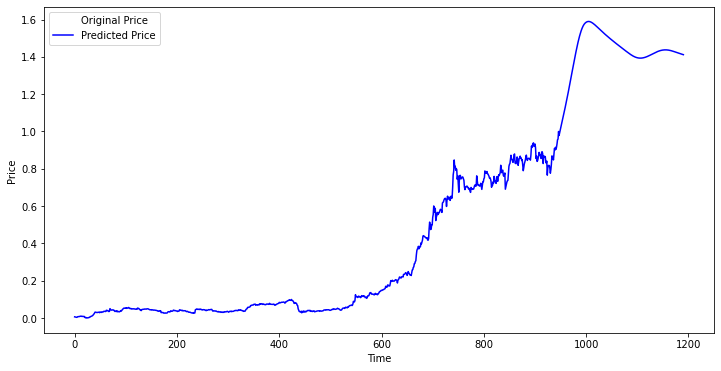

In [150]:
plt.figure(figsize=(12,6))
plt.plot(y_train, 'r ' , label = 'Original Price')
plt.plot(scaled_data[101:], 'b', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel ('Price')
plt.legend()
plt.show()